In [101]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder

from sklearn import set_config
from datetime import datetime

In [2]:
df = pd.read_excel('/content/Data (49).xlsx')

In [3]:
!pip install pandas-profiling==3.3.0

In [10]:
from pandas_profiling import ProfileReport

In [40]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  object 
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,CustomerID
count,541909.000000,406829.000000
mean,9.552250,15287.690570
std,218.081158,1713.600303
min,-80995.000000,12346.000000
25%,1.000000,13953.000000
50%,3.000000,15152.000000
75%,10.000000,16791.000000
max,80995.000000,18287.000000


In [8]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice       object
CustomerID     float64
Country         object
dtype: object

In [11]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [28]:
df = df.dropna(subset=['CustomerID'])

In [30]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [55]:
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')
df.dropna(subset=['UnitPrice'], inplace=True)

In [63]:
df['UnitPrice'] = df['UnitPrice'].astype(float)

In [64]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [65]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,363173.000000,363173.000000,363173.000000
mean,12.107808,3.417796,15275.674935
std,49.740832,71.959738,1716.192837
min,-9360.000000,0.000000,12347.000000
25%,2.000000,0.850000,13918.000000
50%,5.000000,1.650000,15136.000000
75%,12.000000,3.750000,16779.000000
max,12540.000000,38970.000000,18287.000000


In [69]:
df['UnitPrice'].isnull().value_counts()

False    363173
Name: UnitPrice, dtype: int64

In [75]:
df['UnitPrice'].apply(lambda x : x<0).value_counts()

False    363173
Name: UnitPrice, dtype: int64

In [85]:
df = df[df['UnitPrice'] > 0]

In [86]:
df['Quantity'].isnull().value_counts()

False    363133
Name: Quantity, dtype: int64

In [87]:
df['Quantity'].apply(lambda x : x<0).value_counts()

False    355183
True       7950
Name: Quantity, dtype: int64

In [88]:
df = df[df['Quantity'] > 0]

In [89]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,355183.000000,355183.000000,355183.000000
mean,12.627617,3.060506,15282.078407
std,41.844743,20.623428,1715.885884
min,1.000000,0.040000,12347.000000
25%,2.000000,0.850000,13939.000000
50%,6.000000,1.650000,15147.000000
75%,12.000000,3.750000,16790.000000
max,4800.000000,8142.750000,18287.000000


In [93]:
df.duplicated().sum().any()

True

In [95]:
df = df.drop_duplicates()

In [103]:
df['CustomerID'] = df['CustomerID'].astype(int)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [104]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

<AxesSubplot:>

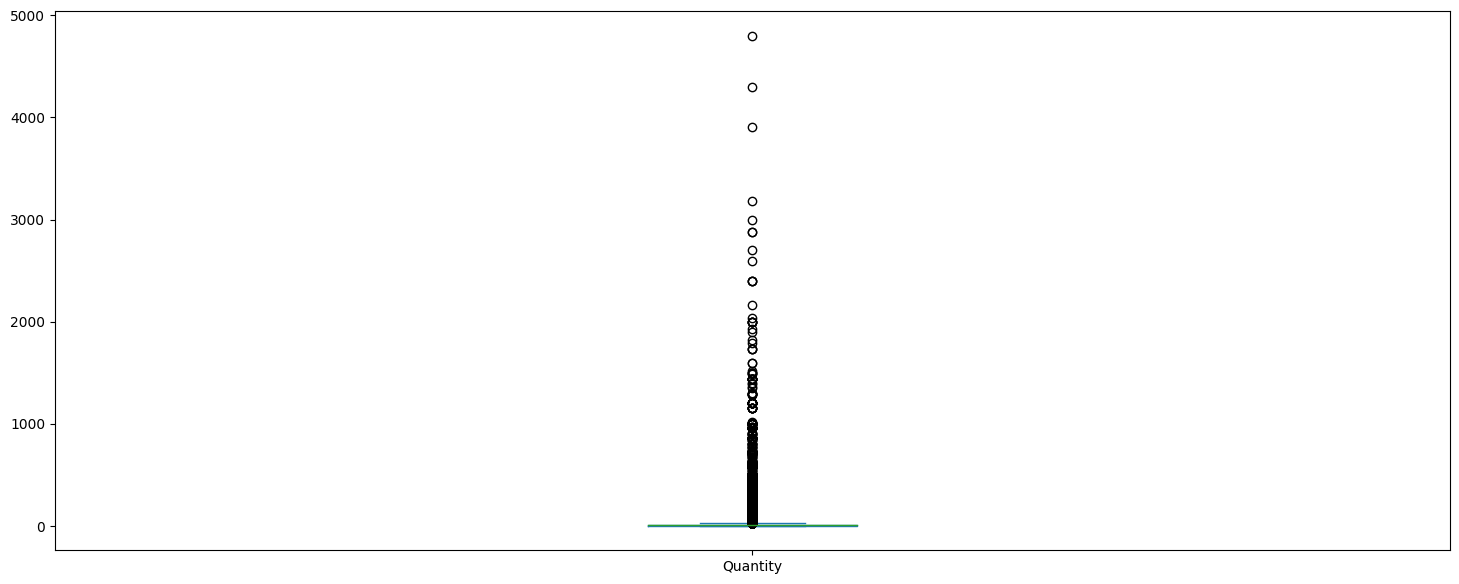

In [108]:
df['Quantity'].plot.box(figsize=(18,7))

<AxesSubplot:>

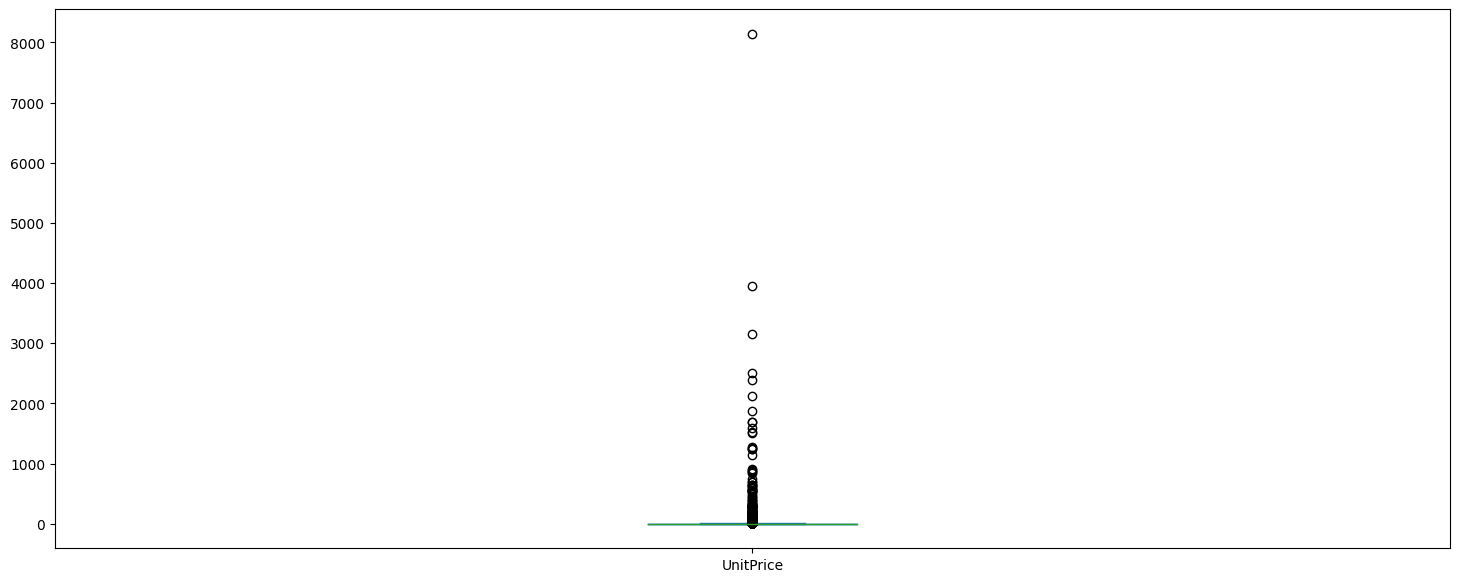

In [109]:
df['UnitPrice'].plot.box(figsize=(18,7))

In [110]:
df = df[df['Quantity'] < 10000]

In [111]:
df = df[df['UnitPrice'] < 5000]

In [113]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,350561.000000,350561.000000,350561.000000
mean,12.752825,3.047191,15275.385605
std,42.024686,15.552111,1716.382436
min,1.000000,0.040000,12347.000000
25%,2.000000,0.850000,13917.000000
50%,6.000000,1.650000,15134.000000
75%,12.000000,3.750000,16780.000000
max,4800.000000,3949.320000,18287.000000


In [114]:
df['TotalPrice'] = df['Quantity']*df['UnitPrice']

In [115]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34


In [116]:
df['InvoiceDate'].max()

Timestamp('2011-12-10 17:19:00')

In [117]:
# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

Text(0, 0.5, 'Valor em Vendas')

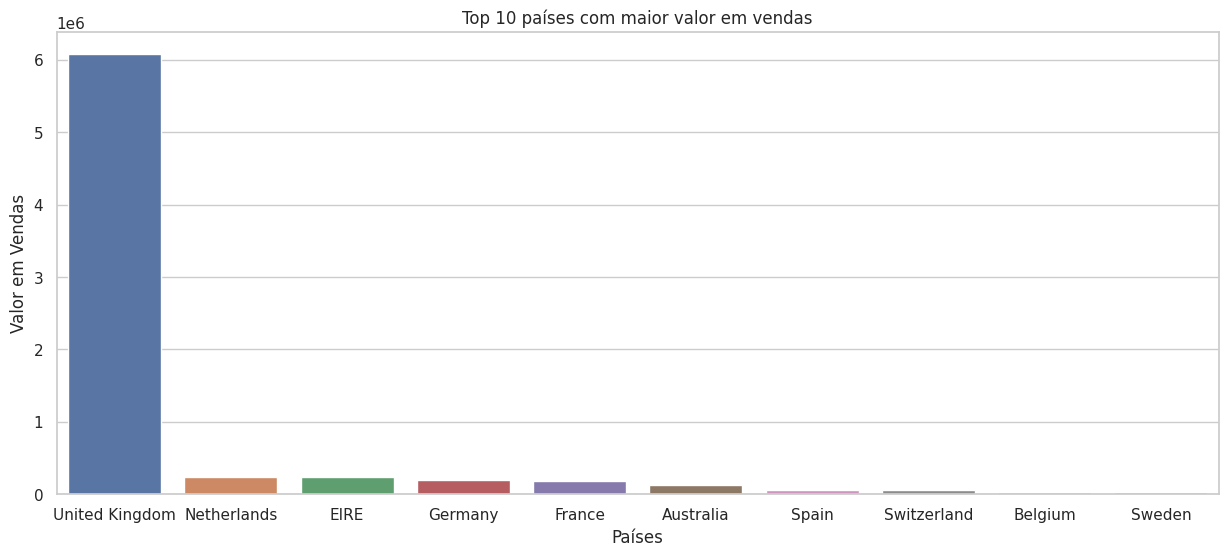

In [132]:
# Top 10 países com maior valor em vendas

TopCountry = df.groupby('Country')['TotalPrice'].sum().nlargest(10)

plt.figure(figsize=(15,6))
sns.barplot(x=TopCountry.index, y=TopCountry.values)
plt.title("Top 10 países com maior valor em vendas")
plt.xlabel("Países")
plt.ylabel("Valor em Vendas")

Text(0, 0.5, 'Quantidade vendida')

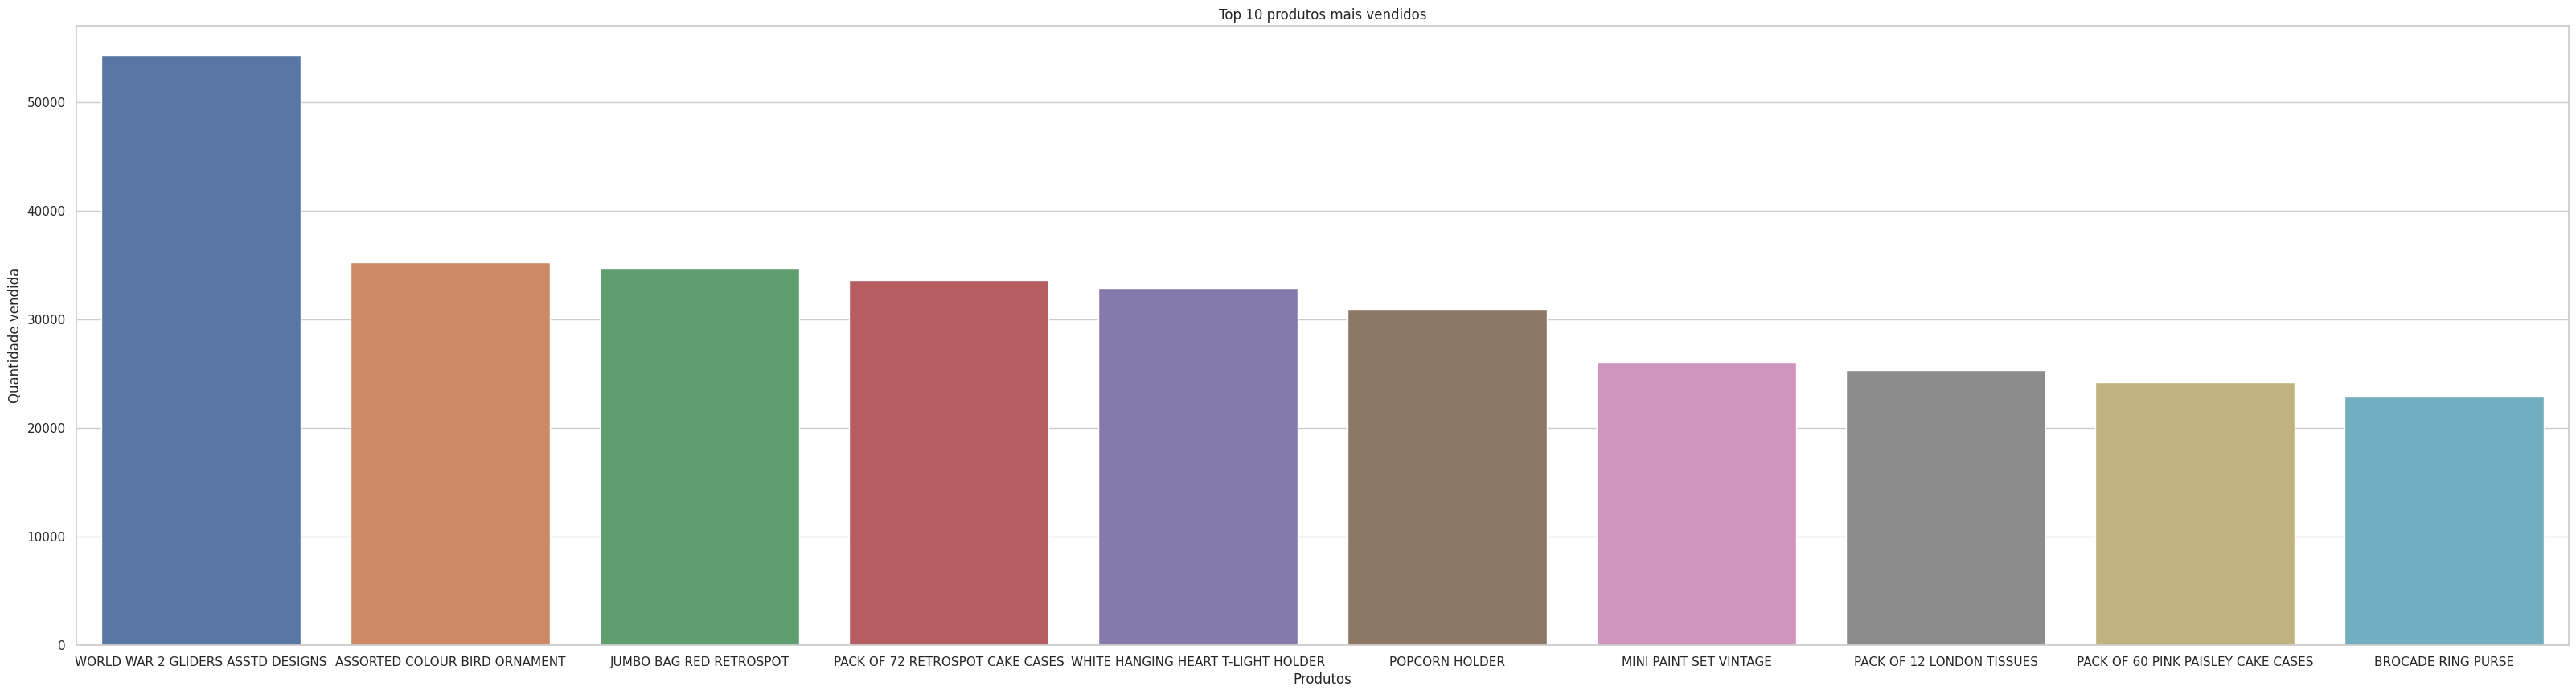

In [142]:
# Top 10 produtos mais vendidos

TopProdutos = df.groupby('Description')['Quantity'].sum().nlargest(10)

plt.figure(figsize=(40,10))
sns.barplot(x=TopProdutos.index, y=TopProdutos.values)
plt.title("Top 10 produtos mais vendidos")
plt.xlabel("Produtos")
plt.ylabel("Quantidade vendida")

Text(0, 0.5, 'Valor total em vendas')

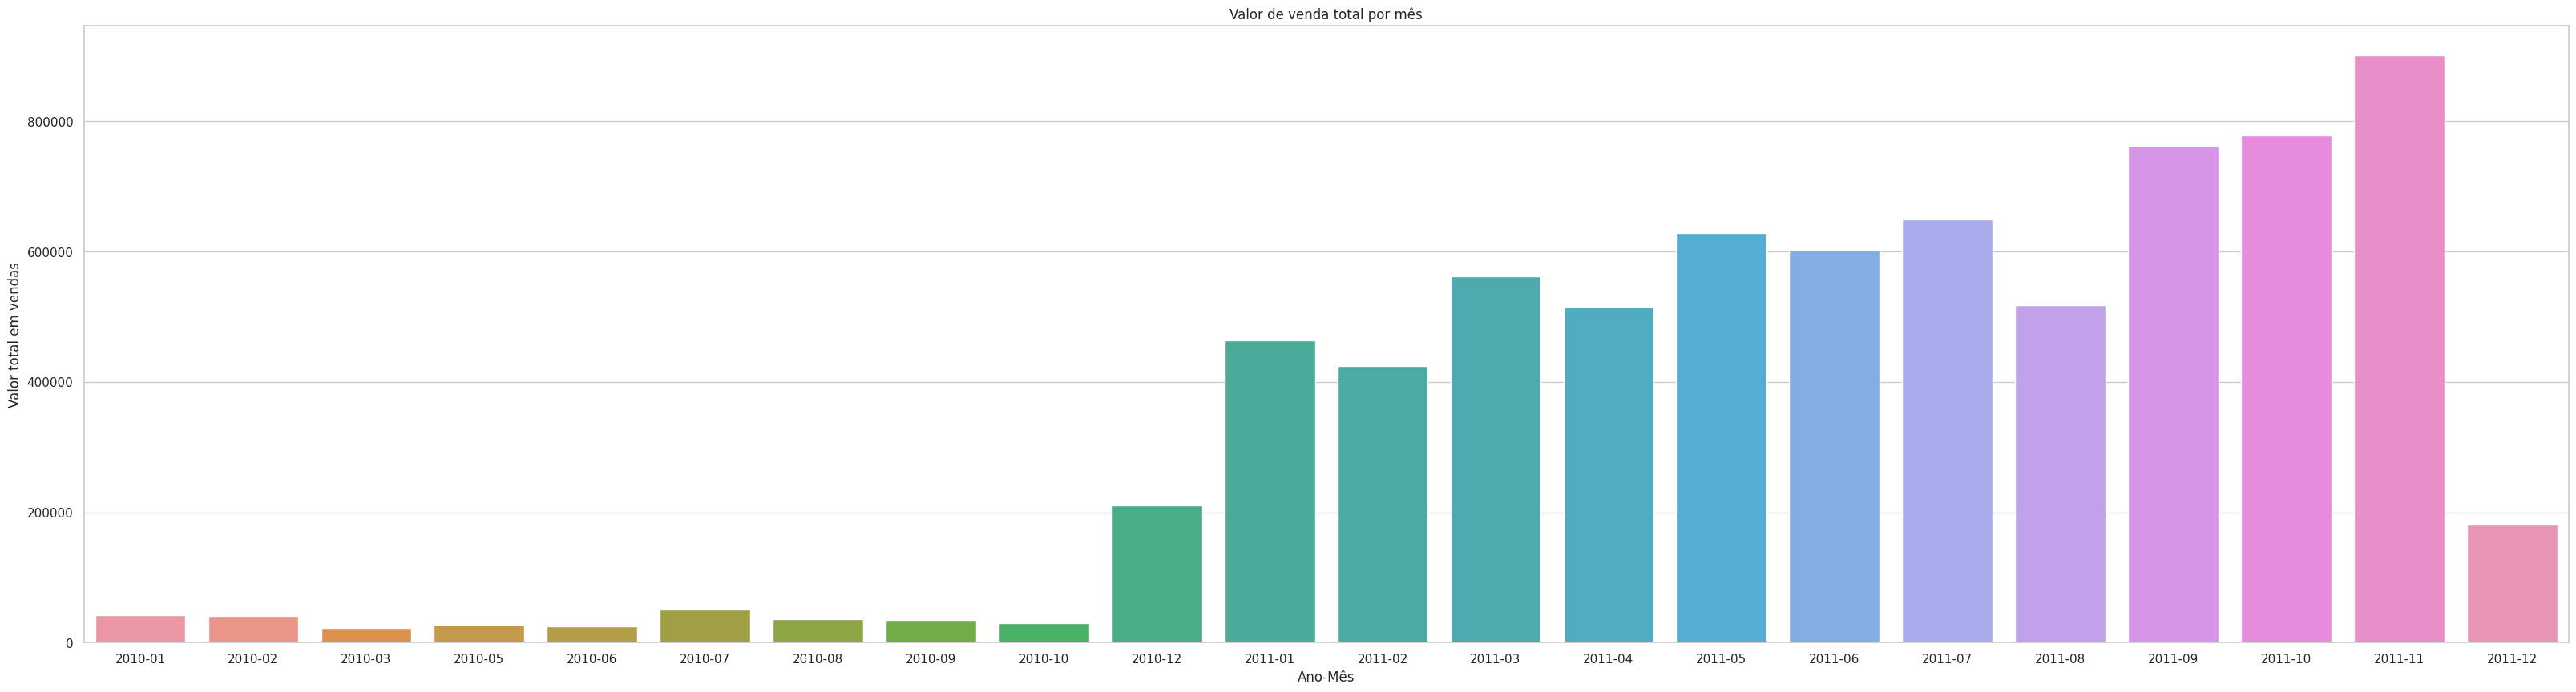

In [144]:
# Valor de venda total por mês

df['Month']=df['InvoiceDate'].dt.to_period('M')

VendasMes = df.groupby('Month')['TotalPrice'].sum()

plt.figure(figsize=(40,10))
sns.barplot(x=VendasMes.index, y=VendasMes.values)
plt.title("Valor de venda total por mês")
plt.xlabel("Ano-Mês")
plt.ylabel("Valor total em vendas")

In [157]:
# Valor de venda total por mês e por país (considere apenas os top 10)

TopCountry = df.groupby('Country')['TotalPrice'].sum().nlargest(10)
df_TopCountry = df[df['Country'].isin(TopCountry.index)]
VendasMesPais = df_TopCountry.groupby(['Month','Country'])['TotalPrice'].sum().unstack()
VendasMesPais.head()

Country,Australia,Belgium,EIRE,France,Germany,Netherlands,Spain,Sweden,Switzerland,United Kingdom
Month,,,,,,,,,,
2010-01,256.25,NaN,555.38,855.86,261.48,192.6,NaN,NaN,NaN,38021.02
2010-02,NaN,NaN,22.50,NaN,138.35,NaN,NaN,NaN,NaN,41216.02
2010-03,NaN,320.9,1680.25,412.78,415.73,NaN,620.0,NaN,303.4,17681.31
2010-05,NaN,NaN,NaN,1404.12,2143.89,NaN,NaN,NaN,NaN,21632.11
2010-06,NaN,NaN,1106.30,NaN,196.44,NaN,NaN,NaN,NaN,23365.51


Text(0, 0.5, 'Valor total em vendas por país (top 10)')

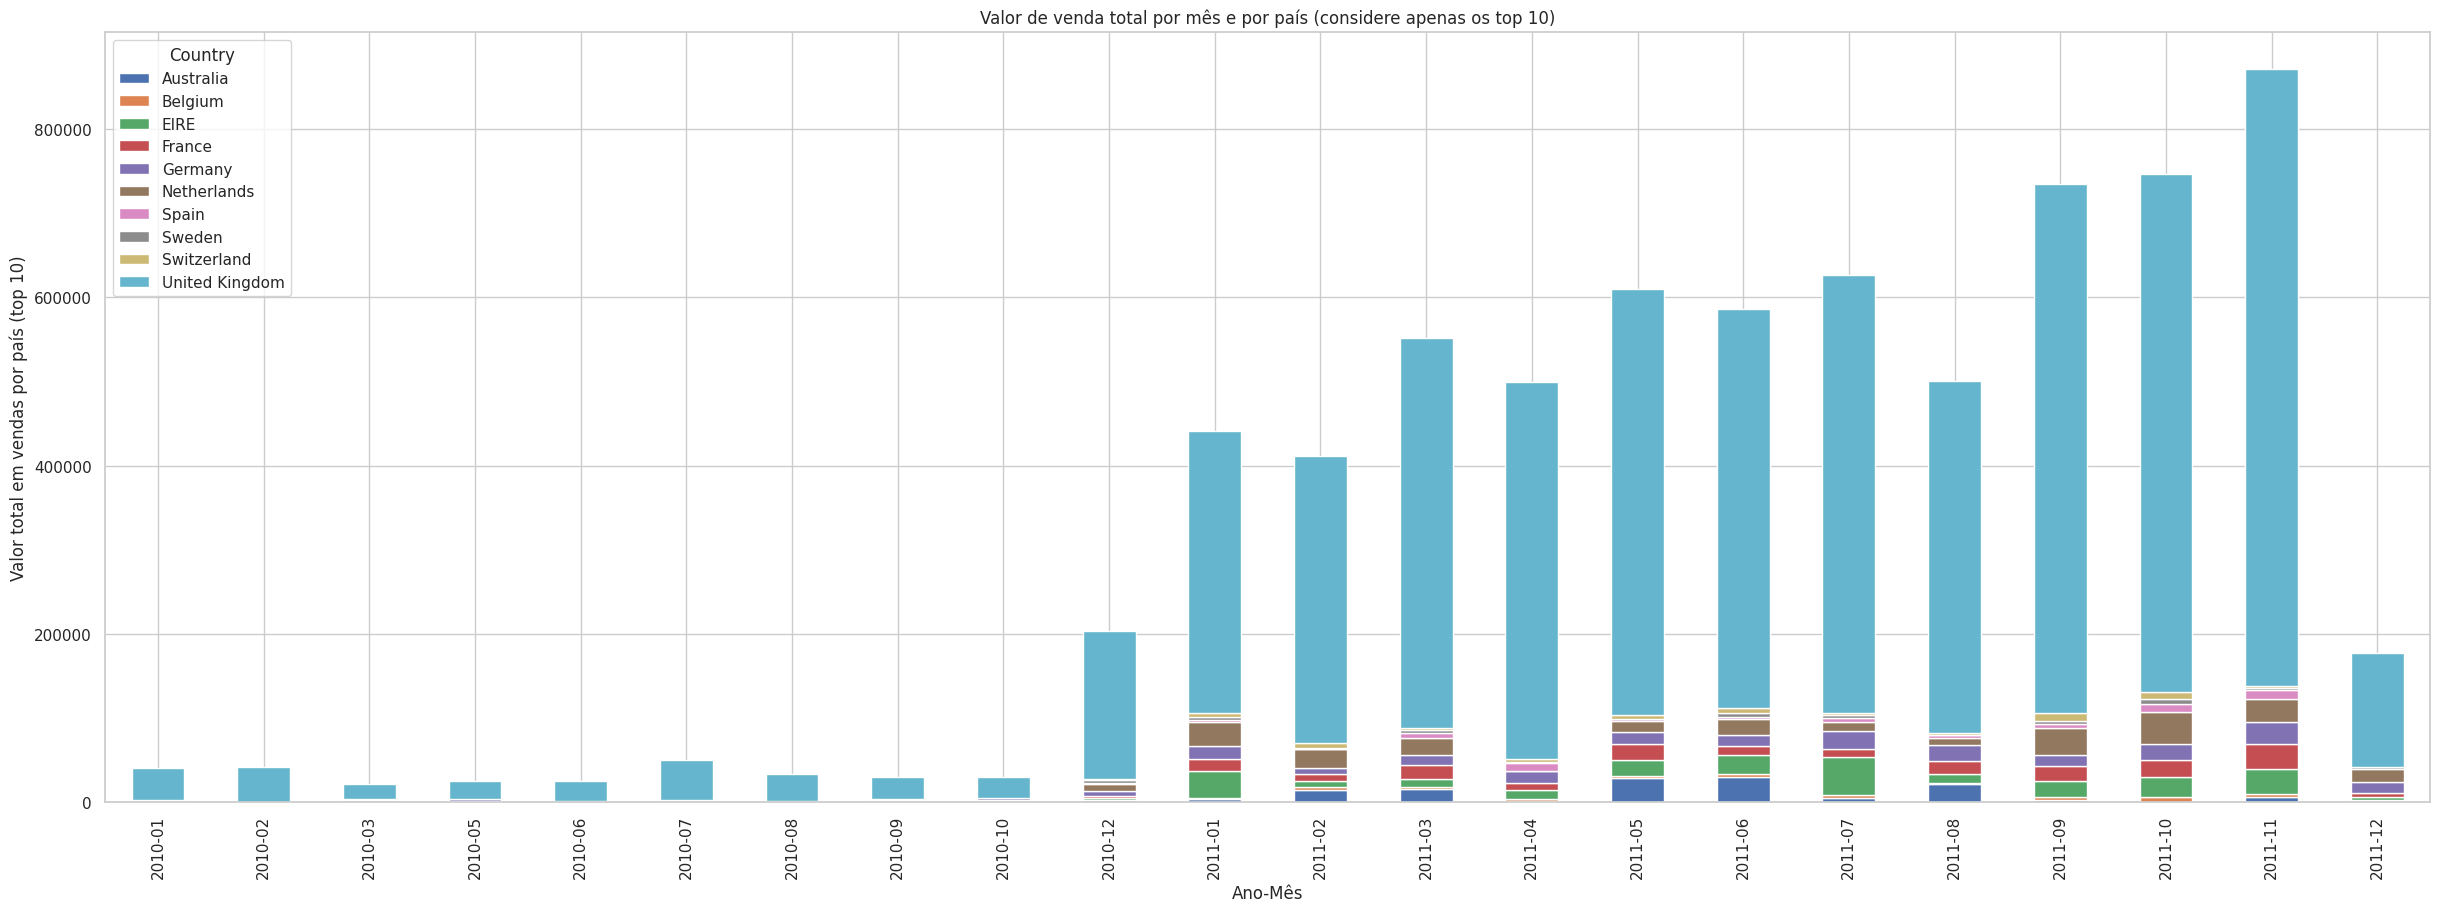

In [166]:
VendasMesPais.plot(kind='bar', stacked = True, figsize=(30,10))
plt.title("Valor de venda total por mês e por país (considere apenas os top 10)")
plt.xlabel("Ano-Mês")
plt.ylabel("Valor total em vendas por país (top 10)")

In [177]:
df_cliente_pedido = df.groupby(['CustomerID','InvoiceNo']).agg({'TotalPrice':'sum','InvoiceDate':'max'}).reset_index()
df_cliente_pedido.head()

,CustomerID,InvoiceNo,TotalPrice,InvoiceDate
0,12347,537626,673.99,2010-07-12 14:57:00
1,12347,542237,462.79,2011-01-26 14:30:00
2,12347,549222,386.65,2011-07-04 10:43:00
3,12347,556201,357.56,2011-09-06 13:01:00
4,12347,562032,584.91,2011-02-08 08:48:00


In [178]:
#Ultima data

df['InvoiceDate'].max()

Timestamp('2011-12-10 17:19:00')

In [187]:
df_rfm = df_cliente_pedido.groupby(['CustomerID']).agg({
    'InvoiceDate' : lambda x: (df['InvoiceDate'].max() - x.max()).days,
    'InvoiceNo' : 'count',
    'TotalPrice' : 'mean'
}).reset_index()
df_rfm.head()

,CustomerID,InvoiceDate,InvoiceNo,TotalPrice
0,12347,40,7,556.811429
1,12348,76,4,449.310000
2,12349,19,1,1662.970000
3,12350,311,1,233.600000
4,12352,73,8,298.970000


In [189]:
df_rfm.columns = ['CustomerID', 'Recencia', 'Frequência', 'TicketMedio']
df_rfm.head()

,CustomerID,Recencia,Frequência,TicketMedio
0,12347,40,7,556.811429
1,12348,76,4,449.310000
2,12349,19,1,1662.970000
3,12350,311,1,233.600000
4,12352,73,8,298.970000
